# Importing the libraries

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import apriori
import time

# Import the dataset

In [ ]:
df = pd.read_csv('1.categorized_noOutlier.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

In [ ]:
df['qty'] = df['qty'].astype(float)
df['amount'] = df['amount'].astype(float)
df.head()

In [ ]:
df['item_code'].nunique()

4441

In [ ]:
df['invoice'].nunique()

22582

In [ ]:
df['description'].nunique()

5944

In [ ]:
print('max: ', df['amount'].max())
print('min: ', df['amount'].min())
# print('range: ', df['unit_price'].max() - df['unit_price'].min())

max:  23000.0
min:  0.0


In [ ]:
df['product'].unique()

array(['BISCUIT', 'BEVERAGE', 'INCENSE', 'MILK POWDER', 'CLEANSERS',
       'YOGHURT', 'CEREAL', 'DRIED FRUITS', 'INSTANT FOOD',
       'CONFECTIONERY', 'SNACKS', 'BABY PRODUCTS', 'SUGAR', 'VEGETABLES',
       'EGGS', 'SPREADS', 'PASTA NOODLES', 'DRY RATIONS', 'PERSONAL CARE',
       'SAUCE', 'TREACLE', 'DESSERT', 'SEASONING', 'FRUITS', 'HOUSEHOLD',
       'FLOUR', 'FISH', 'COOKING OIL', 'STATIONERY', 'MEDICINE', 'BAKERY',
       'MEAT', 'BREAD', 'DRINKING MILK', 'FROZEN', 'MEAL ACCOMPANIMENTS',
       'GARNISH', 'ESSENCE', 'PET CARE'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99314 entries, 0 to 99313
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   invoice       99314 non-null  int64  
 1   item_code     99314 non-null  int64  
 2   bill_date     99314 non-null  object 
 3   month         99314 non-null  int64  
 4   date          99314 non-null  int64  
 5   description   99314 non-null  object 
 6   product       99314 non-null  object 
 7   brand         99314 non-null  object 
 8   unit_price    99314 non-null  object 
 9   qty           99314 non-null  float64
 10  discount      99314 non-null  object 
 11  amount        99314 non-null  float64
 12  year          99314 non-null  int64  
 13  invoice_date  99314 non-null  object 
 14  day           99314 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 11.4+ MB


In [ ]:
df['item'] = df['brand'] + ' ' + df['product']
df.head()

In [ ]:
df['item'].nunique()

999

# Apriori Implementation - join items

In [ ]:
df2 = df[['invoice','item']]

In [ ]:
df2.head()

get 2 copies of the original dataset

In [ ]:
data = df2.copy()
data1 = data.copy()

In [ ]:
newdata = pd.get_dummies(data['item'])

newdata has only the dummy variables

drop the *product* column from data1

In [ ]:
data1.drop('item', axis=1, inplace=True)

In [ ]:
data1.head()

,invoice
0,1000001
1,1000001
2,1000001
3,1000002
4,1000002


join the dummy variables table *newdata* to data1

In [ ]:
data1 = data1.join(newdata)

In [ ]:
products = df['item'].unique()

group the products so that products of each bill will be displayed.  

## groupby dataframe as *newitemsdf*

In [ ]:
newitemsdf = data1.groupby(['invoice'])[products[:]].sum()

only the transaction items are visible 

In [ ]:
newitemsdf = newitemsdf.reset_index()[products]

In [ ]:
data1['invoice'].nunique()

22582

# For discounts and promotions

In [ ]:
def func2(data):
  for i in products:
    if data[i] > 0:
      # if the cell is greater than 0, replace it by 1. 
      data[i] = 1
  return data

In [ ]:
newitemsdf3=newitemsdf.apply(func2, axis=1)

In [ ]:
newitemsdf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22582 entries, 0 to 22581
Columns: 999 entries, MALIBAN BISCUIT to DUM DUM SUGAR
dtypes: uint8(999)
memory usage: 21.5 MB


# 1 itemset min support - item

In [ ]:
fp_len_1itemset = fpgrowth(newitemsdf3, min_support=0.00004, use_colnames=True, max_len=1)
# these items should be at least in 1 transaction from the total 

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Text(0.5, 0, 'Support')

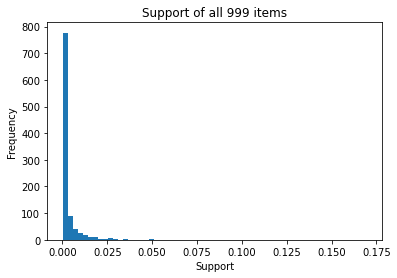

In [ ]:
fp_len_1itemset['support'].plot(kind='hist', bins=60)
plt.title('Support of all 999 items')
plt.xlabel('Support')
# supports of items are not normally distributed. hence median of these supports were considered as the threshold support 

In [ ]:
0.169737*22582

3833.000934

In [ ]:
fp_len_1itemset['support'].mean()

0.003262007911728927

In [ ]:
22582*0.00326 # average number of products sold count = 74

73.61731999999999

In [ ]:
fp_len_1itemset['support'].median()

0.0007085289168364184

In [ ]:
0.0007085289168364184*22582

16.0

# 0.0007 as min support - median support of items

In [ ]:
t1=time.time()
apriori(newitemsdf3, min_support=0.0007, use_colnames=True, max_len=2)
t2=time.time()
(t2-t1)

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


159.3921341896057

In [ ]:
t1=time.time()
fpgrowth(newitemsdf3, min_support=0.0007, use_colnames=True, max_len=2)
t2=time.time()
(t2-t1)

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


1.8652663230895996

In [ ]:
fp_items = fpgrowth(newitemsdf3, min_support=0.0007, use_colnames=True, max_len=2)
# discounts and promotions are applied for 2 items at a time

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
fp_rules_sup0007_sort = fp_rules_sup0007.sort_values(by=['confidence', 'lift'], ascending=False)

In [ ]:
fp_rules_sup0007_sort.to_csv('fp_rules_sup0007_sort.csv')

In [ ]:
fp_rules_sup0007_sort.shape

(4246, 9)

Remove the vegetables and fruits since they cannot be given discounts with other items which can be kept for a long time 

In [ ]:
y = fp_rules_sup0007_sort[fp_rules_sup0007_sort['antecedents']!='UNBRANDED VEGETABLES']
y = y[y['consequents']!='UNBRANDED VEGETABLES']
y = y[y['antecedents']!='UNBRANDED FRUITS']
y = y[y['consequents']!='UNBRANDED FRUITS']
y

The highly related items can be extracted with these measures

In [ ]:
y.sort_values(by=['support'], ascending=False).head()

In [ ]:
y.sort_values(by=['lift'], ascending=False).head()

In [ ]:
y.sort_values(by=['leverage'], ascending=False).head()

In [ ]:
y.sort_values(by=['conviction'], ascending=False).head()

In [ ]:
y.sort_values(by=['antecedent support'], ascending=False).head()

In [ ]:
y.sort_values(by=['consequent support'], ascending=False).head()

rule visualization for join items

In [ ]:
import networkx as nx

In [ ]:
# create a network graph
G = nx.from_pandas_edgelist(rule1, source='antecedents', target='consequents', edge_attr='confidence')

# set node positions using Kamada-Kawai algorithm
pos = nx.kamada_kawai_layout(G)

# draw network graph
nx.draw(G, pos, with_labels=True, node_size=200, node_color='lightblue', font_size=11, edge_cmap=plt.cm.Reds)

# add edge labels
labels = nx.get_edge_attributes(G, 'confidence')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=11)

# set the axis limits and show the plot
ax = plt.gca()
ax.set_xlim([min(x for x,y in pos.values())-0.1, max(x for x,y in pos.values())+0.1])
ax.set_ylim([min(y for x,y in pos.values())-0.1, max(y for x,y in pos.values())+0.1])
plt.axis('on')
plt.show()
# # show the graph
# plt.show()


In [ ]:
y.to_csv('brand_product_wise_associations_no_vegfru.csv')

# Apriori Implementation - for product display

get 2 copies of the original dataset

In [ ]:
data_ = df.copy()
data1_ = data_.copy()

In [ ]:
newdata_ = pd.get_dummies(data_['product'])

In [ ]:
newdata_.head(2)

,BABY PRODUCTS,BAKERY,BEVERAGE,BISCUIT,BREAD,CEREAL,CLEANSERS,CONFECTIONERY,COOKING OIL,DESSERT,...,PET CARE,SAUCE,SEASONING,SNACKS,SPREADS,STATIONERY,SUGAR,TREACLE,VEGETABLES,YOGHURT
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data1_.drop('product', axis=1, inplace=True)

join the dummy variables table *newdata_* to data1_

In [ ]:
data1_ = data1_.join(newdata_)

In [ ]:
products_ = df['product'].unique()

In [ ]:
products_

array(['BISCUIT', 'BEVERAGE', 'INCENSE', 'MILK POWDER', 'CLEANSERS',
       'YOGHURT', 'CEREAL', 'DRIED FRUITS', 'INSTANT FOOD',
       'CONFECTIONERY', 'SNACKS', 'BABY PRODUCTS', 'SUGAR', 'VEGETABLES',
       'EGGS', 'SPREADS', 'PASTA NOODLES', 'DRY RATIONS', 'PERSONAL CARE',
       'SAUCE', 'TREACLE', 'DESSERT', 'SEASONING', 'FRUITS', 'HOUSEHOLD',
       'FLOUR', 'FISH', 'COOKING OIL', 'STATIONERY', 'MEDICINE', 'BAKERY',
       'MEAT', 'BREAD', 'DRINKING MILK', 'FROZEN', 'MEAL ACCOMPANIMENTS',
       'GARNISH', 'ESSENCE', 'PET CARE'], dtype=object)

group the products so that products of each bill will be displayed.  

groupby dataframe as *newitemsdf*

In [ ]:
newitemsdf_ = data1_.groupby('invoice')[products_[:]].sum()

In [ ]:
newitemsdf_.head()

,BISCUIT,BEVERAGE,INCENSE,MILK POWDER,CLEANSERS,YOGHURT,CEREAL,DRIED FRUITS,INSTANT FOOD,CONFECTIONERY,...,MEDICINE,BAKERY,MEAT,BREAD,DRINKING MILK,FROZEN,MEAL ACCOMPANIMENTS,GARNISH,ESSENCE,PET CARE
invoice,,,,,,,,,,,,,,,,,,,,,
1000001,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000002,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000003,0,3,2,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000004,0,0,0,2,2,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000005,0,0,0,0,0,0,1,1,2,3,...,0,0,0,0,0,0,0,0,0,0


only the transaction items are visible 

In [ ]:
newitemsdf_ = newitemsdf_.reset_index()[products_]

In [ ]:
newitemsdf_.head()

,BISCUIT,BEVERAGE,INCENSE,MILK POWDER,CLEANSERS,YOGHURT,CEREAL,DRIED FRUITS,INSTANT FOOD,CONFECTIONERY,...,MEDICINE,BAKERY,MEAT,BREAD,DRINKING MILK,FROZEN,MEAL ACCOMPANIMENTS,GARNISH,ESSENCE,PET CARE
0,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,2,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,2,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,2,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def func2(data):
  for i in products_:
    if data[i] > 0:
      # if the cell is greater than 0, replace it by 1 
      data[i] = 1
  return data

In [ ]:
newitemsdf2_ = newitemsdf_.apply(func2, axis=1)

In [ ]:
newitemsdf2_.head()

,BISCUIT,BEVERAGE,INCENSE,MILK POWDER,CLEANSERS,YOGHURT,CEREAL,DRIED FRUITS,INSTANT FOOD,CONFECTIONERY,...,MEDICINE,BAKERY,MEAT,BREAD,DRINKING MILK,FROZEN,MEAL ACCOMPANIMENTS,GARNISH,ESSENCE,PET CARE
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


# 1 itemset min support - product

In [ ]:
# find the min support of each product category
# 1/22582 = 0.00004 : each product category is bought at least one time 
fp_len_1itemset_prod = fpgrowth(newitemsdf2_, min_support=0.00004, use_colnames=True, max_len=1)
fp_len_1itemset_prod.sort_values(by='support', ascending=False)

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.315473,(BEVERAGE)
1,0.184616,(BISCUIT)
7,0.181561,(CONFECTIONERY)
13,0.170401,(VEGETABLES)
18,0.149721,(PERSONAL CARE)
8,0.131299,(SNACKS)
33,0.115667,(DRINKING MILK)
2,0.106589,(CLEANSERS)
22,0.103135,(FRUITS)
23,0.094500,(SEASONING)


In [ ]:
fp_len_1itemset_prod.sort_values(by='support', ascending=False).tail(10)

,support,itemsets
29,0.027943,(STATIONERY)
19,0.027765,(SAUCE)
4,0.024843,(INCENSE)
27,0.024223,(COOKING OIL)
6,0.020326,(CEREAL)
36,0.018599,(MEAL ACCOMPANIMENTS)
10,0.016385,(DRIED FRUITS)
20,0.005181,(TREACLE)
37,0.004871,(ESSENCE)
38,0.000221,(PET CARE)


Text(0.5, 0, 'Support')

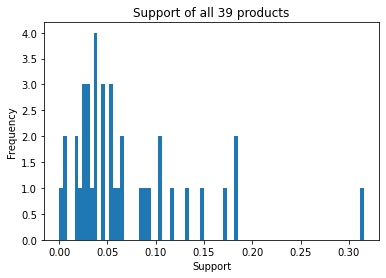

In [ ]:
fp_len_1itemset_prod['support'].plot(kind='hist', bins=80)
plt.title('Support of all 39 products')
plt.xlabel('Support')
# support of each product category
# not normally distributed 

In [ ]:
fp_len_1itemset_prod['support'].mean()

0.06890557262534942

In [ ]:
fp_len_1itemset_prod['support'].median()
# select median support as the threshold support

0.046275794880878574

In [ ]:
t1=time.time()
apriori(newitemsdf2_, min_support=0.05, use_colnames=True)
t2=time.time()
(t2-t1)

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


0.21864557266235352

In [ ]:
t1=time.time()
fpgrowth(newitemsdf2_, min_support=0.05, use_colnames=True)
t2=time.time()
(t2-t1)

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


0.21341514587402344

In [ ]:
0.07*22582

1580.7400000000002

# 2 itemset for products - median

In [ ]:
fp_tree_len2_prod = apriori(newitemsdf2_, min_support=0.05, use_colnames=True)
fp_tree_len2_prod

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.184616,(BISCUIT)
1,0.315473,(BEVERAGE)
2,0.053361,(MILK POWDER)
3,0.106589,(CLEANSERS)
4,0.084138,(YOGHURT)
5,0.057789,(INSTANT FOOD)
6,0.181561,(CONFECTIONERY)
7,0.131299,(SNACKS)
8,0.170401,(VEGETABLES)
9,0.064520,(SPREADS)


association rule mining

In [ ]:
fp_tree_rules = association_rules(fp_tree_len2_prod, metric="lift", min_threshold=1)

In [ ]:
fp_tree_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BISCUIT),(BEVERAGE),0.184616,0.315473,0.067443,0.365315,1.157995,0.009202,1.078532
1,(BEVERAGE),(BISCUIT),0.315473,0.184616,0.067443,0.213784,1.157995,0.009202,1.037100
2,(CONFECTIONERY),(BISCUIT),0.181561,0.184616,0.057125,0.314634,1.704262,0.023606,1.189706
3,(BISCUIT),(CONFECTIONERY),0.184616,0.181561,0.057125,0.309427,1.704262,0.023606,1.185159
4,(CONFECTIONERY),(BEVERAGE),0.181561,0.315473,0.060756,0.334634,1.060740,0.003479,1.028799
5,(BEVERAGE),(CONFECTIONERY),0.315473,0.181561,0.060756,0.192588,1.060740,0.003479,1.013658
6,(SNACKS),(BEVERAGE),0.131299,0.315473,0.053228,0.405396,1.285045,0.011807,1.151233
7,(BEVERAGE),(SNACKS),0.315473,0.131299,0.053228,0.168725,1.285045,0.011807,1.045023
8,(PERSONAL CARE),(BEVERAGE),0.149721,0.315473,0.054512,0.364093,1.154121,0.007280,1.076459
9,(BEVERAGE),(PERSONAL CARE),0.315473,0.149721,0.054512,0.172796,1.154121,0.007280,1.027895


In [ ]:
fp_rules_sup005_sort = fp_tree_rules.sort_values(by=['confidence', 'lift'], ascending=False)
fp_rules_sup005_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,SNACKS,BEVERAGE,0.131299,0.315472,0.053228,0.405396,1.285045,0.011807,1.151233
0,BISCUIT,BEVERAGE,0.184616,0.315472,0.067443,0.365315,1.157995,0.009202,1.078532
8,PERSONAL CARE,BEVERAGE,0.149721,0.315472,0.054512,0.364093,1.154121,0.007280,1.076459
4,CONFECTIONERY,BEVERAGE,0.181561,0.315472,0.060756,0.334634,1.060740,0.003479,1.028799
2,CONFECTIONERY,BISCUIT,0.181561,0.184616,0.057125,0.314634,1.704262,0.023606,1.189706
3,BISCUIT,CONFECTIONERY,0.184616,0.181561,0.057125,0.309427,1.704262,0.023606,1.185159
1,BEVERAGE,BISCUIT,0.315472,0.184616,0.067443,0.213784,1.157995,0.009202,1.037100
5,BEVERAGE,CONFECTIONERY,0.315472,0.181561,0.060756,0.192588,1.060740,0.003479,1.013658
9,BEVERAGE,PERSONAL CARE,0.315472,0.149721,0.054512,0.172796,1.154121,0.007280,1.027895
7,BEVERAGE,SNACKS,0.315472,0.131299,0.053228,0.168725,1.285045,0.011807,1.045023


association rule visualization of product category

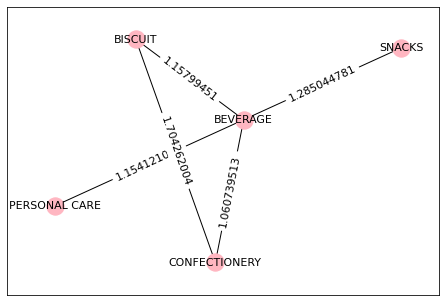

In [ ]:
G = nx.from_pandas_edgelist(fp_rules_sup005_sort, source='antecedents', target='consequents', edge_attr='lift')
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True,node_color='lightpink', font_size=11, edge_cmap=plt.cm.Reds)
labels = nx.get_edge_attributes(G, 'lift')
# edges=nx.draw_networkx_edges(G, pos, width='lift', edge_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=11)
ax = plt.gca()
ax.set_xlim([min(x for x,y in pos.values())-0.25, max(x for x,y in pos.values())+0.2])
ax.set_ylim([min(y for x,y in pos.values())-0.15, max(y for x,y in pos.values())+0.15])
plt.axis('on')
plt.show()